# About k means algorithm 

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.


# Math behind it 

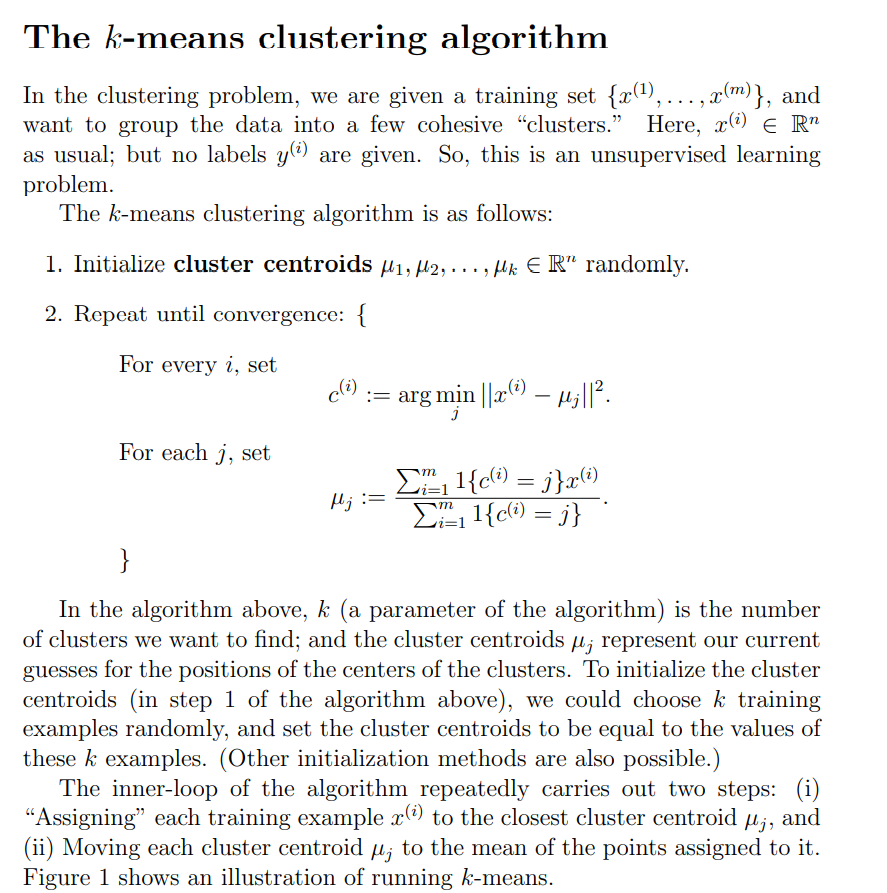

 **understanding**  by equations might be difficult so let us see some figures in order to understand it 
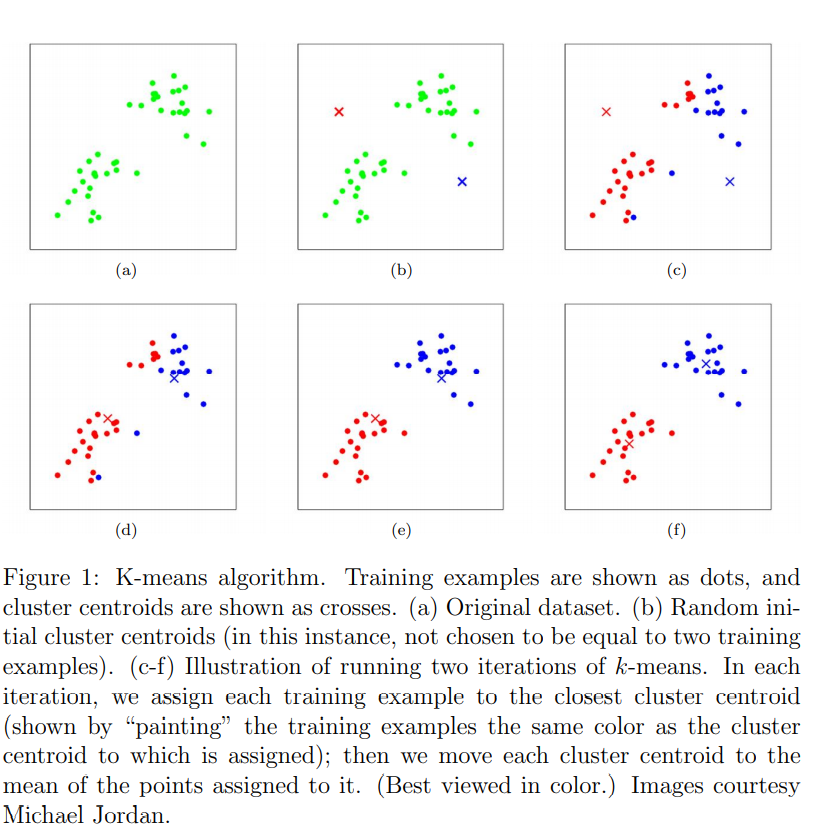

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-data/data.csv


# Goal:
need to cluster universities in 2 groups as public or private using K means 

# EDA

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("../input/college-data/data.csv")

In [4]:
data

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

there are no null values so we can proceed 

In [6]:
data.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


now let us see how every column is related to one another 

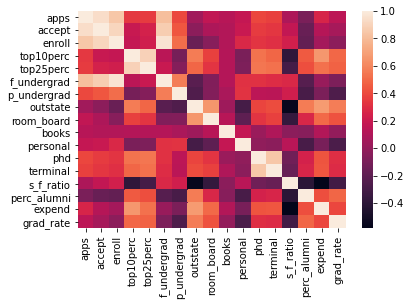

In [7]:
sns.heatmap(data.corr())

let us see now how distribution of the applications are 

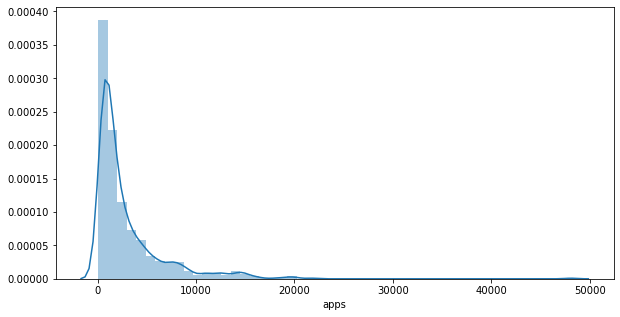

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(data['apps'])

let us see how many students are being accepted into private and public universities 

/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


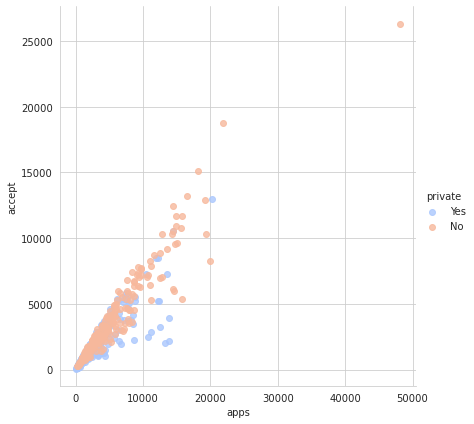

In [9]:
sns.set_style('whitegrid')
sns.lmplot('apps','accept',data=data, hue='private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

if the applications are in range b/n 1-10000 then nearly in both private and public universities nearly 5K students are being accepted 

how are the costs for books depending  on the type of university 

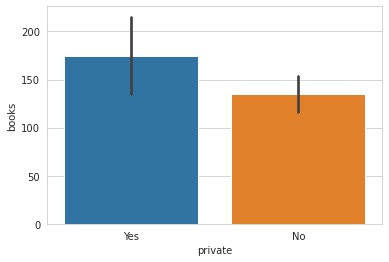

In [10]:
sns.barplot(x='private',y='books',data=data,estimator=np.std)

sad truth :( 

In [11]:
#sns.pairplot(data,hue='private',palette='coolwarm')

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


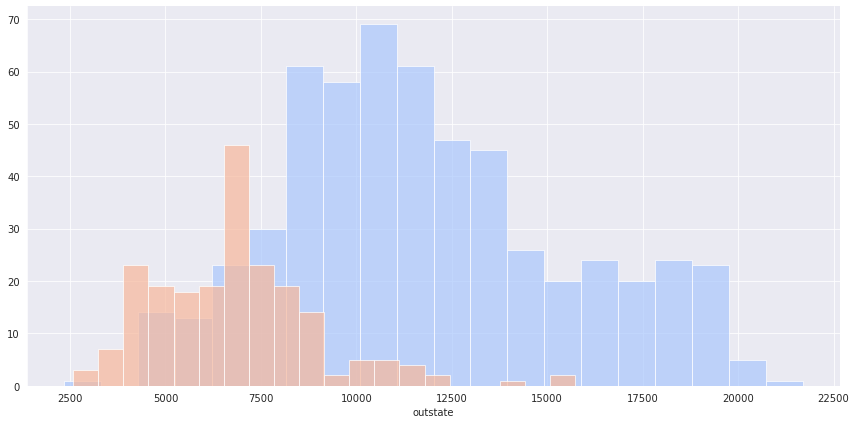

In [12]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data,hue="private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'outstate',bins=20,alpha=0.7)

i can say that students studying in public universities are less opting for out of state tution and they spend less compated to students in private universities 

# k means clustering 

In [13]:
from sklearn.cluster import KMeans


choosing number of clusters for this case it is 2 

In [14]:
kmeans = KMeans(n_clusters=2)

as per the aim to cluster universities as private & public we choose clusters as 2 and drop the private column 

start the k means algo on the data i.e to choose centriods 

In [15]:
kmeans.fit(data.drop('private',axis=1))

KMeans(n_clusters=2)

In [16]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

the number of axis of the cluster center depends on the number of features or in this case the number of columns given to a single data point or sample 

# **Note**
that this is a unsupervised learning algorithm so making predictions not practical as there will be no true label in real world examples 

# Evaluation

In [17]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [18]:
data['Cluster'] = data['private'].apply(converter)

In [19]:
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,Cluster
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


now let us create a confusion matrix how this unsupervised learning algorithm works

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Cluster'],kmeans.labels_))
print(classification_report(data['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



this seems to work well haha !